In [1]:
pip install nltk==3.3

  Using cached nltk-3.3-py3-none-any.whl


In [1]:
import nltk
nltk.download('punkt')
nltk.download("twitter_samples")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [2]:
from nltk.corpus.reader.nkjp import NKJPCorpus_Segmentation_View
from nltk.corpus import twitter_samples

#initilizing the positive, negative, neutral language samples.
positive_samples = twitter_samples.strings('positive_tweets.json')
negative_samples = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [3]:
#Now tokenizing the data.
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [4]:
#printing the top 10 tokenized tweets.
for i in range(0, 10):
  print(tweet_tokens[i])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!']
['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']
['@97sides', 'CONGRATS', ':)']
['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']
['@BhaktisBanter', '@PallaviRuhail', 'This', 'one', 'is', 'irresistible', ':)', '#FlipkartFashionFriday', 'http://t.co/EbZ0L2VENM']
['We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'ho

In [5]:
#Normalizing the data.
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [6]:
from nltk.tag import pos_tag
for i in range(0, 10):
  print(pos_tag(tweet_tokens[i]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]
[('@Lamb2ja', 'NN'), ('Hey', 'NNP'), ('James', 'NNP'), ('!', '.'), ('How', 'NNP'), ('odd', 'JJ'), (':/', 'NNP'), ('Please', 'NNP'), ('call', 'VB'), ('our', 'PRP$'), ('Contact', 'NNP'), ('Centre', 'NNP'), ('on', 'IN'), ('02392441234', 'CD'), ('and', 'CC'), ('we', 'PRP'), ('will', 'MD'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('assist', 'VB'), ('you', 'PRP'), (':)', 'VBP'), ('Many', 'JJ'), ('thanks', 'NNS'), ('!', '.')]
[('@DespiteOfficial', 'JJ'), ('we', 'PRP'), ('had', 'VBD'), ('a', 'DT'), ('listen', 'VBN'), ('last', 'JJ'), ('night', 'NN'), (':)', 'NN'), ('As', 'IN'), ('You', 'PRP'), ('Bleed', 'VBP'), ('is', 'VBZ'), ('an', 'DT'), ('amazing', 'JJ'), ('track', 'NN'), ('.', '.'), ('When', 'WRB'), ('are'

In [7]:
#Preparing for the Normalization and Noise Cleaning step. 
#So importing the standard stoping words in English.
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#importing the Lemmatizer method from nltk.
from nltk.stem.wordnet import WordNetLemmatizer
import re, string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajwal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
#Now writing the function to lemmatize and clean the noise from the tweet_tokens
def remove_noise(tweet_tokens, stop_words = ()):
  cleaned_token = []
  for token, tag in pos_tag(tweet_tokens):
    #searching for hyperlinks in this re.sub method and replacing it with ''.
    token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', token)
    #searching for twitter handel in this re.sub method and replacing it with ''.
    token = re.sub('(@[A-Za-z0-9_]+)', '', token)
    #lemmatizing it now.
    if tag.startswith('NN'):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a'
    lemmatizer = WordNetLemmatizer()
    token = lemmatizer.lemmatize(token, pos)
    #checking if the word length is more than 0, it is not in string.puctuation and it is not in stop_word.
    if len(token)>0 and token not in string.punctuation and token.lower() not in stop_words:
      cleaned_token.append(token.lower())
  return cleaned_token

#calling the above method:
for i in range(10):
  print(remove_noise(tweet_tokens[i]))

['#followfriday', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']
['hey', 'james', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks']
['we', 'have', 'a', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'be', 'an', 'amazing', 'track', 'when', 'be', 'you', 'in', 'scotland']
['congrats', ':)']
['yeaaaah', 'yippppy', 'my', 'accnt', 'verify', 'rqst', 'have', 'succeed', 'get', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'day']
['this', 'one', 'be', 'irresistible', ':)', '#flipkartfashionfriday']
['we', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customer', 'wait', 'for', 'long', 'we', 'hope', 'you', 'enjoy', 'happy', 'friday', 'lwwf', ':)']
['on', 'second', 'thought', 'there', '’', 's', 'just', 'not', 'enough', 'time', 'for', 'a', 'dd', ':)', 'but', 'new', 'short', 'enter', 'system', 'sheep', '

In [9]:
#Now cleaning the data for next next step.
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [10]:
#Comparing the inputs without cleaning and with cleaned version.
print(positive_tweet_tokens[20])
print(positive_cleaned_tokens_list[20])

['#FollowFriday', '@MBandScott_', '@Eric_FLE', '@pointsolutions3', 'for', 'being', 'top', 'new', 'followers', 'in', 'my', 'community', 'this', 'week', ':)']
['#followfriday', 'top', 'new', 'follower', 'community', 'week', ':)']


In [11]:
#function to get all possible words from input tweets:
def get_all_words(cleaned_tokens_list):
  list_of_words = []
  for tokens in cleaned_tokens_list:
      for token in tokens:
          yield token
          list_of_words.append(token)
  return list_of_words
#running it on positive_cleaned_tokens_list
all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [12]:
#Using the freqDist for finding the distribution.
from nltk import FreqDist
word_freq = []
freq_dist_pos = FreqDist(all_pos_words)
word_freq = freq_dist_pos.most_common(20)

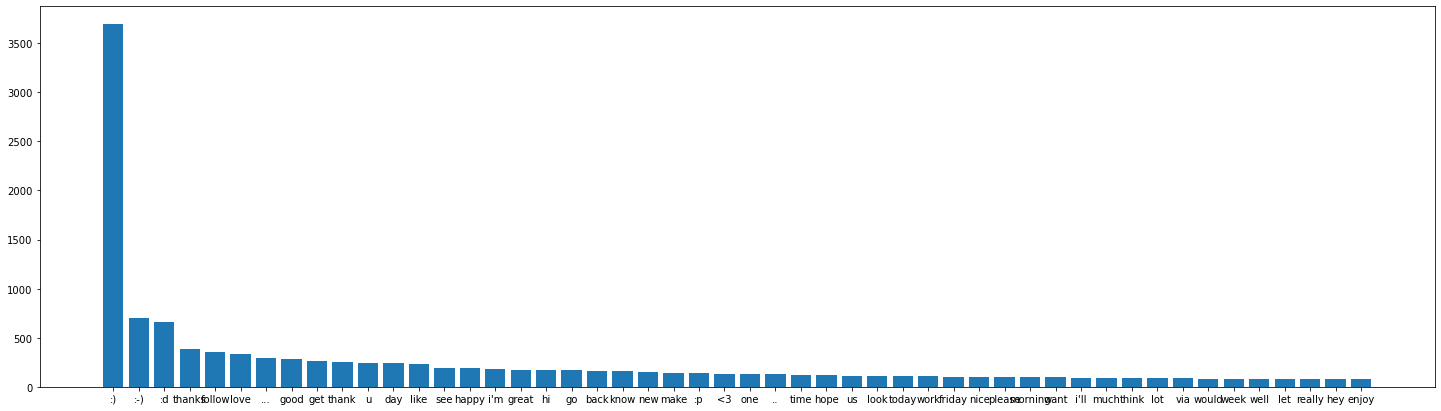

In [13]:
# Ploting the most used words just for fun :)
word_freq = freq_dist_pos.most_common(50)
x = []
y = []
for i in range(len(word_freq)):
  x.append(word_freq[i][0])
  y.append(word_freq[i][1])

import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
plt.bar(x, y)
plt.show()

In [14]:
#The Naive Bayes classifier model requires a Python dictionary with words as keys and True as values.
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [15]:
# Splitting the Dataset for Training and Testing the Model
import random

positive_dataset = [(tweet_dict, "Positive") for tweet_dict in positive_tokens_for_model]
negative_dataset = [(tweet_dict, "Negative") for tweet_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

#getting the total size of our dataset.
print(len(positive_cleaned_tokens_list) + len(negative_cleaned_tokens_list))
random.shuffle(dataset)

# Spliting it into 0-6999 for training and 7000 - 10000 for testing.
train_data = dataset[:7000]
test_data = dataset[0:]

10000


**Building and Testing the Model**

We  are going to use the `NaiveBayesClassifier` class to build the model. Use the `.train()` method to train the model and the `.accuracy()` method to test the model on the testing data.

In [16]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

In [17]:
print("Accuracy in percentage:", classify.accuracy(classifier, test_data)*100)
print(classifier.show_most_informative_features(10))

Accuracy in percentage: 99.75
Most Informative Features
                      :( = True           Negati : Positi =   2043.5 : 1.0
                      :) = True           Positi : Negati =   1694.2 : 1.0
                     sad = True           Negati : Positi =     22.6 : 1.0
                follower = True           Positi : Negati =     20.9 : 1.0
                     bam = True           Positi : Negati =     20.7 : 1.0
                    glad = True           Positi : Negati =     19.3 : 1.0
                 welcome = True           Positi : Negati =     15.5 : 1.0
                  arrive = True           Positi : Negati =     13.2 : 1.0
                     ugh = True           Negati : Positi =     12.8 : 1.0
                followed = True           Negati : Positi =     12.4 : 1.0
None


**Now testing the custom sentences with same model.**

In [18]:
from nltk.tokenize import word_tokenize
custom_tweet = "I made the best out of worst possible situation."
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Positive
